In [0]:
#Loading the dataset from the shared google drive link
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=1NNI-_9esakJS7VRfPXS4M13CuLaOVqxo"
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('A_Z Handwritten Data.csv')

#Packages be used
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import cv2


In [0]:
with open("A_Z Handwritten Data.csv","r") as f:
    data_file=csv.reader(f)
    data=[]
    for each in data_file:
        data.append(each)


['14', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '34', '110', '204', '239', '154', '59', '42', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '44', '102', '197', '255', '255', '255', '255', '255', '212', '89', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '43', '164', '242', '255', '255', '255', '255', '255', '255', '253', '210', '89

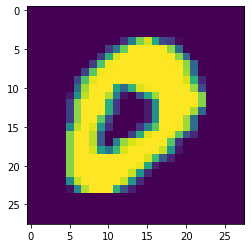

In [0]:
#Test character
item = data[154564]
x=np.array([int(i) for i in item[1:]])
x=x.reshape(28,28)
print(item)
plt.imshow(x)

In [0]:
train_data = []
train_label = []
for each in data:
  x=np.array([int(j) for j in each[1:]])
  x=x.reshape(28,28)
  train_data.append(x)
  train_label.append(int(each[0]))

In [0]:
print(len(train_label))

372451


In [0]:
import random
shuff=list(range(372451))
random.shuffle(shuff)
train_data=np.array(train_data)
train_label=np.array(train_label)
train_data=train_data[shuff]
train_label=train_label[shuff]

In [0]:
print(train_data.shape)
train_x = train_data[:300000]
train_y = train_label[:300000]

val_x = train_data[300000:335000]
val_y = train_label[300000:335000]

test_x = train_data[335000:]
test_y = train_label[335000:]

(372451, 28, 28)


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers import regression
from tflearn.data_utils import to_categorical

In [0]:
BATCH_SIZE = 32
IMG_SIZE = 28
N_CLASSES = 26
LR = 0.001
N_EPOCHS = 20

In [0]:
tf.reset_default_graph()

network = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1]) #1

network = conv_2d(network, 32, 3, activation='relu') #2
network = max_pool_2d(network, 2) #3

network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)

network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)

network = fully_connected(network, 1024, activation='relu') #4
network = dropout(network, 0.8) #5

network = fully_connected(network, N_CLASSES, activation='softmax')#6
network = regression(network)

model = tflearn.DNN(network) #7

In [0]:
train_x = train_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
val_x = val_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_x = test_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
original_test_y = test_y 

train_y = to_categorical(train_y, N_CLASSES)
val_y = to_categorical(val_y, N_CLASSES)
test_y = to_categorical(test_y, N_CLASSES)

In [0]:
model.fit(train_x, train_y, n_epoch=N_EPOCHS, validation_set=(val_x, val_y), show_metric=True)

Training Step: 93759  | total loss: 0.71170 | time: 39.172s
| Adam | epoch: 020 | loss: 0.71170 - acc: 0.9621 -- iter: 299968/300000
Training Step: 93760  | total loss: 0.64284 | time: 41.279s
| Adam | epoch: 020 | loss: 0.64284 - acc: 0.9659 | val_loss: 0.05888 - val_acc: 0.9882 -- iter: 300000/300000
--


In [0]:
test_logits = model.predict(test_x)
test_logits = np.argmax(test_logits, axis=-1)
print(np.sum(test_logits == original_test_y) / len(test_logits))

0.9878240901444554


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
model.save("/content/model.tflearn")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
INFO:tensorflow:/content/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.
